<a href="https://colab.research.google.com/github/reypowgithub/Tugas_PCD_TelU_2023/blob/main/Tugas_PCD_Assigment4_1301204091_Reynhard_Powiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4F3 PEMROSESAN CITRA DIGITAL**

---

# Assignment 4: Edge Detection

---

<p>Nama = Reynhard Powiwi</p>
<p>Kelas = IF-44-PIL-IS02 📚👨‍🎓</p>

---

Cari paper terkait edge detection lalu pilih salah satu metode edge detection. Buat program menggunakan bahasa Python untuk mengaplikasikan metode edge detection yang Anda pilih tadi pada citra RGB dan grayscale.

Tugas dikerjakan di Google Colab.

Pengumpulan tugas
1. Tuliskan dari mana source codenya 📦
2. Gunakan input citra RGB yang dibuat sendiri / milik sendiri
3. Program harus menampilkan citra asal dan citra output akibat metode edge detection, baik untuk citra RGB dan citra grayscale.
4. Hasil pekerjaan Unggah ke LMS ini file .ipynb 📸
5. Lalu, kirim link google colab-nya  ke email dosen pengampu dengan body email(gammakosala@telkomuniversity.ac.id) "Tugas_PCD_Assigment4_NIM_NAMA"


1) lakukan import library dan inputan gambar

In [24]:
# Import Library
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files  # Import library for file uploads
from google.colab.patches import cv2_imshow

# Buat untuk dapat melakukan upload gambar
uploaded = files.upload()

# Print list of uploaded files
print(uploaded.keys())



Saving 004.png to 004 (1).png
dict_keys(['004 (1).png'])


Pertama yang harus kita lakukan adalah mengimport semua library yang dibutuhkan untuk pengerjaan project ini. kemudian kita membuat inputan files untuk memasukan citra yang akan kita proses.

2) Membuat Fungsi sobel edge detection

Fungsi **sobel_edge_detection** ini digunakan untuk melakukan deteksi tepi menggunakan operator Sobel pada sebuah citra. Berikut adalah penjelasan langkah-langkah yang diambil dalam fungsi ini:

1.   Fungsi dimulai dengan mengonversi citra warna (dalam format RGB) menjadi citra grayscale. Hal ini dilakukan untuk menyederhanakan proses deteksi tepi, karena operator Sobel bekerja pada citra 1 saluran (grayscale).
2.   Operator Sobel digunakan untuk menghitung gradien citra pada arah horizontal (dx=1, dy=0) dan arah vertikal (dx=0, dy=1). Ini dilakukan dengan menggunakan fungsi **cv2.Sobel**
3.   Hasil dari operator Sobel, yang berupa gradien dalam arah X dan Y, disimpan dalam variabel x dan y. Selanjutnya, hasil ini dikonversi ke skala absolut menggunakan **cv2.convertScaleAbs**. Ini diperlukan karena gradien dapat memiliki nilai negatif, tetapi kita hanya tertarik pada magnitudonya.
4.   Kedua hasil gradien X dan Y digabungkan menggunakan **cv2.addWeighted** dengan bobot masing-masing setengah (0.5) untuk menciptakan citra hasil deteksi tepi.
5.   Hasil akhir dari deteksi tepi menggunakan operator Sobel, yang merupakan citra hasil deteksi tepi, dikembalikan oleh fungsi.




In [25]:
def sobel_edge_detection(image):

    # Konversi gambar ke grayscale
    if len(image.shape) == 3:  # Citra RGB
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:  # Citra grayscale
        gray = image

    # Menggunakan operator sobel
    x = cv2.Sobel(gray, cv2.CV_16S, 1, 0)
    y = cv2.Sobel(gray, cv2.CV_16S, 0, 1)

    # Mengkonversi ke skala absolute
    Scale_absX = cv2.convertScaleAbs(x)
    Scale_absY = cv2.convertScaleAbs(y)

    # Menggabungkan gradien X dan Gradien Y dengan bobot 0.5
    result = cv2.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)

    return result

2) Menampilkan citra RGB dan GrayScale

Kode berikut digunakan untuk memuat gambar dalam format RGB menggunakan OpenCV dan menampilkannya menggunakan Matplotlib. Berikut adalah penjelasan langkah-langkahnya:




1.   Pertama memilih file gambar yang akan digunakan dari daftar file yang diunggah
2.   Kemudian kita membaca ga,bar RGB menggunakan CV2. Argumen -1 menandakan bahwa semua saluran warna (termasuk saluran alpha jika ada) harus dibaca.
3.   Setelah membaca gambar dengan OpenCV, citra biasanya berada dalam urutan warna BGR (Blue, Green, Red). Langkah ini mengonversinya ke urutan warna RGB yang umum digunakan dalam banyak aplikasi.
4.   Kemudian kita manampilkan gambar dengan matplot





Text(0.5, 1.0, 'Citra RGB Asal')

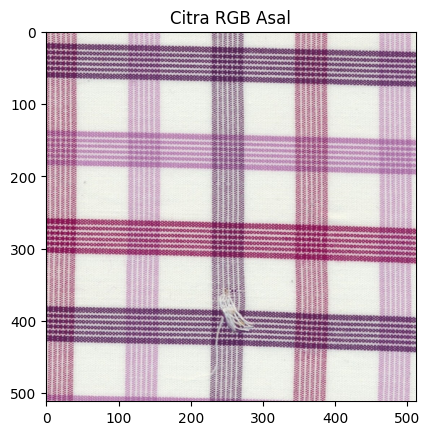

In [26]:
# Pilih file yang ingin Anda gunakan
file_name = list(uploaded.keys())[0]

# Memuat gamber RGB menggunakan CV2
image_rgb = cv2.imread(file_name, -1)
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

# menampilkan citra
plt.imshow(image_rgb)
plt.title('Citra RGB Asal')

Kemudian kode berikut digunakan untuk memuat gambar dalam format Greyscale menggunakan OpenCV dan menampilkannya menggunakan Matplotlib. Berikut adalah penjelasan langkah-langkahnya:


1.   Kemudian kita membaca gambar RGB menggunakan CV2. Argumen cv2.IMREAD_GRAYSCALE menandakan bahwa gambar akan di tampilkan dengan skala abu-abu.
2.   Kemudian kita manampilkan gambar dengan matplot.

Text(0.5, 1.0, 'Citra Grayscale Asal')

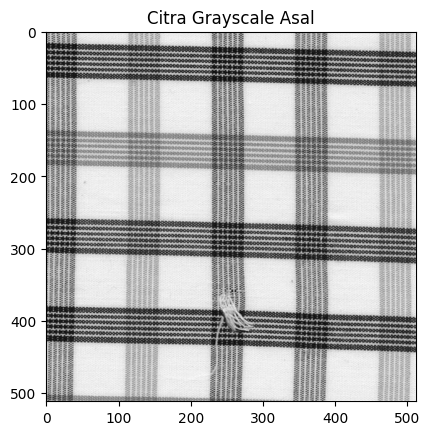

In [27]:
# Memuat gamber Grayscale menggunakan CV2
image_gray = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# menampilkan citra
plt.imshow(image_gray, cmap='gray')
plt.title('Citra Grayscale Asal')

3) Menggunakan Sobel Edge Detection

Text(0.5, 1.0, 'Hasil Edge Detection (RGB)')

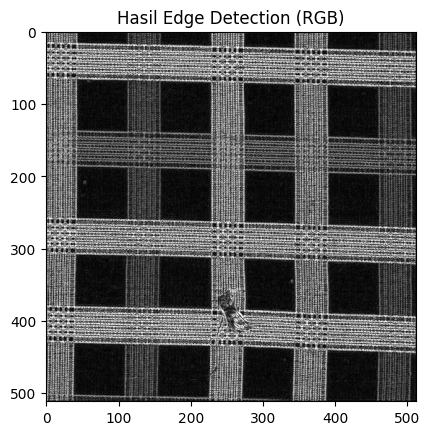

In [28]:
# Edge detection untuk citra RGB
edges_rgb = sobel_edge_detection(image_rgb)

plt.imshow(edges_rgb, cmap='gray')
plt.title('Hasil Edge Detection (RGB)')

Text(0.5, 1.0, 'Hasil Edge Detection (Grayscale)')

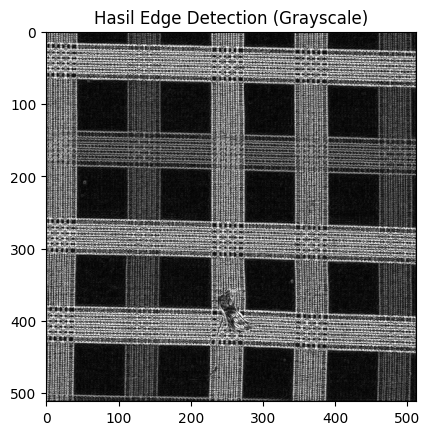

In [29]:
# Edge detection untuk citra Grayscale
edges_gray = sobel_edge_detection(image_gray)

plt.imshow(edges_gray, cmap='gray')
plt.title('Hasil Edge Detection (Grayscale)')

4) Menampilkan hasil dari Sobel Edge detection dengan menggunakan citra RGB dan grayscale

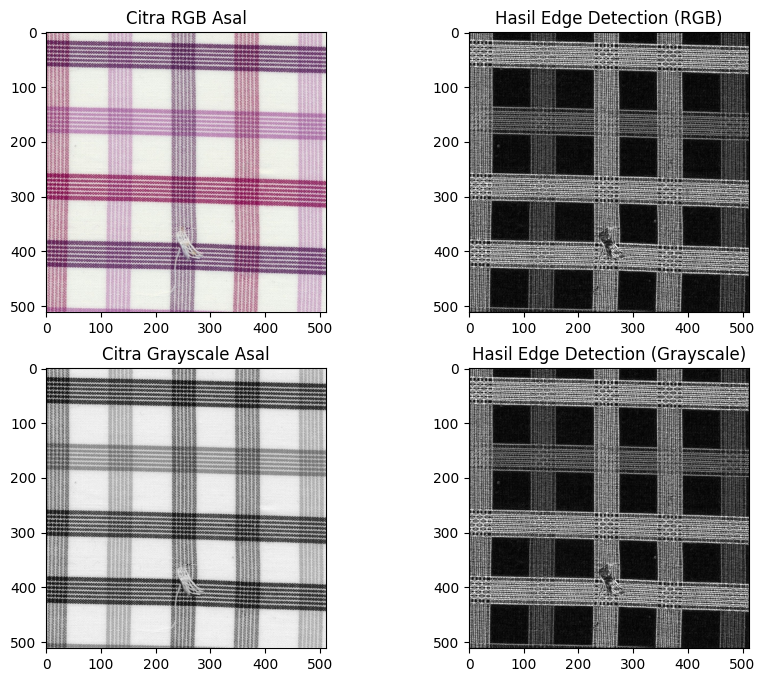

In [30]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra RGB Asal')

plt.subplot(2, 2, 2)
plt.imshow(edges_rgb, cmap='gray')
plt.title('Hasil Edge Detection (RGB)')

plt.subplot(2, 2, 3)
plt.imshow(image_gray, cmap='gray')
plt.title('Citra Grayscale Asal')

plt.subplot(2, 2, 4)
plt.imshow(edges_gray, cmap='gray')
plt.title('Hasil Edge Detection (Grayscale)')

plt.show()

Setelah melakukan Sobel Edge Detection pada citra, hasilnya adalah citra yang menunjukkan garis-garis kontur atau tepi dalam gambar asli. Operator Sobel digunakan untuk menghitung gradien citra, yang mengidentifikasi perubahan intensitas piksel yang tajam di dalam gambar.

Secara khusus, Sobel Edge Detection menghasilkan dua set citra gradien: satu untuk arah X (horizontal) dan satu untuk arah Y (vertikal). Dengan menggabungkan kedua citra ini, kita dapat mendapatkan citra gradien akhir, yang menunjukkan di mana terdapat perubahan intensitas yang signifikan.

Perhatikan bahwa garis-garis pada citra tersebut menunjukkan lokasi tepi atau perubahan intensitas yang signifikan. Setelah mendapatkan citra gradien, biasanya dilakukan langkah-langkah tambahan seperti penerapan thresholding atau hysteresis untuk memisahkan tepi yang signifikan dari noise.

---

**Referensi:**

*    [Referensi Paper]( https://ieeexplore.ieee.org/abstract/document/6467376)
*    [Referensi Project dari paper]( https://github.com/Linsonng/Sobel-and-Dct)





